# 0. Veri Setinin Hazırlanması¶


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-250-korean-dramas-kdrama-dataset/kdrama.csv


In [2]:
df_ = pd.read_csv("/kaggle/input/top-250-korean-dramas-kdrama-dataset/kdrama.csv")
df = df_.copy()
df.head(5)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              249 non-null    object 
 13  Screenwriter          249 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2

In [4]:
def AdjustMonths(date):
    if "-" in date:
        dates = date.split(" - ")  # " - " ile ayır
        month1 = dates[0].split(" ")[0]  # İlk tarihin ayını al
        month2 = dates[1].split(" ")[0]  # İkinci tarihin ayını al
        return f"{month1}-{month2}"  # Ayları birleştir
    else:  # Eğer sadece tek tarih varsa
        month = date.split(" ")[0]
        return f"{month}-{month}"

df["Aired Date"] = np.vectorize(AdjustMonths)(df["Aired Date"])

df.head(5)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,May-May,2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,Jul-Sep,2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,Mar-May,2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,Jun-Sep,2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,Mar-May,2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


In [5]:
def ConvertMinute(duration):
    if not duration or not isinstance(duration, str):  # Eğer veri boşsa veya string değilse
        return "Unknown"  # Bilinmeyen bir değer döndür
    if "hr" in duration:
        try:
            parts = duration.split(" ")  # Süreyi boşluklarla ayır
            hour = int(parts[0]) if parts[0].isdigit() else 0  # Saat kısmını sayıya çevir
            min_part = int(parts[2]) if len(parts) > 2 and parts[2].isdigit() else 0  # Dakika varsa al, yoksa 0
            total_minutes = (hour * 60) + min_part  # Toplam dakikayı hesapla
            return f"{total_minutes} min"
        except (ValueError, IndexError):  # Geçersiz veri formatı hatalarını yakala
            return "Invalid Format"  # Hatalı format döndür
    else:
        try:
            return duration if "min" in duration else "Unknown"  # Eğer zaten dakika formatındaysa döndür
        except ValueError:
            return "Invalid Format"
df["Duration"] = np.vectorize(ConvertMinute)(df["Duration"])

df.head(10)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,May-May,2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,Jul-Sep,2020,tvN,"Wednesday, Thursday",16,70 min,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,Mar-May,2020,"Netflix, tvN",Thursday,12,90 min,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,Jun-Sep,2021,"Netflix, tvN",Thursday,12,100 min,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,Mar-May,2018,tvN,"Wednesday, Thursday",16,77 min,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5
5,Reply 1988,Nov-Jan,2015,tvN,"Friday, Saturday",20,100 min,15+ - Teens 15 or older,9.1,"Five childhood friends, who all live in the sa...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...","Shin Won Ho, Yoo Hak Chan",Lee Woo Jung,"Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...",CJ ENM,#6
6,Weak Hero Class 1,Nov-Nov,2022,Wavve,Friday,8,40 min.,18+ Restricted (violence & profanity),9.1,Yeon Shi Eun is a model student who ranks at t...,"Action, Youth, Drama\r","Bromance, Smart Male Lead, Violence, School Bu...",You Su Min,Jun Hee Han,"Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...",PlayList Global,#7
7,Prison Playbook,Nov-Jan,2017,"Netflix, tvN","Wednesday, Thursday",16,92 min,15+ - Teens 15 or older,9.1,"Kim Je Hyuk, a famous baseball player, is arre...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",Shin Won Ho,"Jung Bo Hoon, Lee Woo Jung","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...",tvN,#8
8,Alchemy of Souls,Jun-Aug,2022,"Netflix, tvN","Saturday, Sunday",20,80 min,15+ - Teens 15 or older,9.0,Set in a fictional country called Daeho that d...,"Action, Historical, Romance, Fantasy","Magical Power, Supernatural, Transmigration, S...",Park Joon Hwa,"Hong Jung Eun, Hong Mi Ran","Lee Jae Wook, Jung So Min, Hwang Hyun Min, Shi...","Studio Dragon, High Quality",#9
9,Extraordinary Attorney Woo,Jun-Aug,2022,"ENA, Netflix","Wednesday, Thursday",16,77 min,15+ - Teens 15 or older,9.0,"Diagnosed with autism spectrum disorder, 27-ye...","Law, Romance, Life, Drama","Autistic Female Lead, Autism, Attorney Female...",Yoo In Shik,Moon Ji Won,"Park Eun Bin, Kang Tae Oh, Kang Ki Young, Jeon...","AStory, KT Studio Genie, Nangman Crew",#10


In [6]:
df["Duration in min"] = df["Duration"].apply(lambda x: x.split(" ")[0])
df = df.drop("Duration", axis=1)
df.head(5)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
0,Move to Heaven,May-May,2021,Netflix,Friday,10,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1,52
1,Flower of Evil,Jul-Sep,2020,tvN,"Wednesday, Thursday",16,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2,70
2,Hospital Playlist,Mar-May,2020,"Netflix, tvN",Thursday,12,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3,90
3,Hospital Playlist 2,Jun-Sep,2021,"Netflix, tvN",Thursday,12,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4,100
4,My Mister,Mar-May,2018,tvN,"Wednesday, Thursday",16,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5,77


In [7]:
df["Rank"] = df["Rank"].apply(lambda x: x[1:])
df.head(11)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
0,Move to Heaven,May-May,2021,Netflix,Friday,10,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",1,52
1,Flower of Evil,Jul-Sep,2020,tvN,"Wednesday, Thursday",16,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,2,70
2,Hospital Playlist,Mar-May,2020,"Netflix, tvN",Thursday,12,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",3,90
3,Hospital Playlist 2,Jun-Sep,2021,"Netflix, tvN",Thursday,12,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",4,100
4,My Mister,Mar-May,2018,tvN,"Wednesday, Thursday",16,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,5,77
5,Reply 1988,Nov-Jan,2015,tvN,"Friday, Saturday",20,15+ - Teens 15 or older,9.1,"Five childhood friends, who all live in the sa...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...","Shin Won Ho, Yoo Hak Chan",Lee Woo Jung,"Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...",CJ ENM,6,100
6,Weak Hero Class 1,Nov-Nov,2022,Wavve,Friday,8,18+ Restricted (violence & profanity),9.1,Yeon Shi Eun is a model student who ranks at t...,"Action, Youth, Drama\r","Bromance, Smart Male Lead, Violence, School Bu...",You Su Min,Jun Hee Han,"Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...",PlayList Global,7,40
7,Prison Playbook,Nov-Jan,2017,"Netflix, tvN","Wednesday, Thursday",16,15+ - Teens 15 or older,9.1,"Kim Je Hyuk, a famous baseball player, is arre...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",Shin Won Ho,"Jung Bo Hoon, Lee Woo Jung","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...",tvN,8,92
8,Alchemy of Souls,Jun-Aug,2022,"Netflix, tvN","Saturday, Sunday",20,15+ - Teens 15 or older,9.0,Set in a fictional country called Daeho that d...,"Action, Historical, Romance, Fantasy","Magical Power, Supernatural, Transmigration, S...",Park Joon Hwa,"Hong Jung Eun, Hong Mi Ran","Lee Jae Wook, Jung So Min, Hwang Hyun Min, Shi...","Studio Dragon, High Quality",9,80
9,Extraordinary Attorney Woo,Jun-Aug,2022,"ENA, Netflix","Wednesday, Thursday",16,15+ - Teens 15 or older,9.0,"Diagnosed with autism spectrum disorder, 27-ye...","Law, Romance, Life, Drama","Autistic Female Lead, Autism, Attorney Female...",Yoo In Shik,Moon Ji Won,"Park Eun Bin, Kang Tae Oh, Kang Ki Young, Jeon...","AStory, KT Studio Genie, Nangman Crew",10,77


In [8]:
def Content(cnt):
    if isinstance(cnt, str):  # Eğer veri string ise
        content = cnt.split("+")[0].strip()
        return f"{content}+"
    else:  # Eğer veri string değilse
        return "Unknown"
df["Content Rating"] = df["Content Rating"].apply(Content)
df.head(5)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
0,Move to Heaven,May-May,2021,Netflix,Friday,10,18+,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",1,52
1,Flower of Evil,Jul-Sep,2020,tvN,"Wednesday, Thursday",16,15+,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,2,70
2,Hospital Playlist,Mar-May,2020,"Netflix, tvN",Thursday,12,15+,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",3,90
3,Hospital Playlist 2,Jun-Sep,2021,"Netflix, tvN",Thursday,12,15+,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",4,100
4,My Mister,Mar-May,2018,tvN,"Wednesday, Thursday",16,15+,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,5,77


## 0.1 Veriye NaN Değer Ekleme

In [9]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [10]:
df.isnull().sum()

Name                     7
Aired Date               7
Year of release         10
Original Network        10
Aired On                 2
Number of Episodes       6
Content Rating           9
Rating                  10
Synopsis                13
Genre                    6
Tags                     8
Director                 8
Screenwriter             4
Cast                     8
Production companies     7
Rank                     6
Duration in min          8
dtype: int64

In [11]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")


Veri seti içerisinde toplam 4121 adet eksik olmayan, 129 eksik gözlem var.


In [12]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  243 non-null    object 
 1   Aired Date            243 non-null    object 
 2   Year of release       240 non-null    float64
 3   Original Network      240 non-null    object 
 4   Aired On              248 non-null    object 
 5   Number of Episodes    244 non-null    float64
 6   Content Rating        241 non-null    object 
 7   Rating                240 non-null    float64
 8   Synopsis              237 non-null    object 
 9   Genre                 244 non-null    object 
 10  Tags                  242 non-null    object 
 11  Director              242 non-null    object 
 12  Screenwriter          246 non-null    object 
 13  Cast                  242 non-null    object 
 14  Production companies  243 non-null    object 
 15  Rank                  2

In [13]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object" or df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

In [14]:
categorical_features, numerical_features


(['Name',
  'Aired Date',
  'Original Network',
  'Aired On',
  'Content Rating',
  'Synopsis',
  'Genre',
  'Tags',
  'Director',
  'Screenwriter',
  'Cast',
  'Production companies',
  'Rank',
  'Duration in min'],
 ['Year of release', 'Number of Episodes', 'Rating'])

In [15]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  243 non-null    category
 1   Aired Date            243 non-null    category
 2   Year of release       240 non-null    float64 
 3   Original Network      240 non-null    category
 4   Aired On              248 non-null    category
 5   Number of Episodes    244 non-null    float64 
 6   Content Rating        241 non-null    category
 7   Rating                240 non-null    float64 
 8   Synopsis              237 non-null    category
 9   Genre                 244 non-null    category
 10  Tags                  242 non-null    category
 11  Director              242 non-null    category
 12  Screenwriter          246 non-null    category
 13  Cast                  242 non-null    category
 14  Production companies  243 non-null    category
 15  Rank  

In [16]:
df["Duration in min"] = df["Duration in min"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  243 non-null    category
 1   Aired Date            243 non-null    category
 2   Year of release       240 non-null    float64 
 3   Original Network      240 non-null    category
 4   Aired On              248 non-null    category
 5   Number of Episodes    244 non-null    float64 
 6   Content Rating        241 non-null    category
 7   Rating                240 non-null    float64 
 8   Synopsis              237 non-null    category
 9   Genre                 244 non-null    category
 10  Tags                  242 non-null    category
 11  Director              242 non-null    category
 12  Screenwriter          246 non-null    category
 13  Cast                  242 non-null    category
 14  Production companies  243 non-null    category
 15  Rank  

# 1.Eksik Veri Analizi

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year of release,240.0,2018.225000,3.288022,2003.0,2017.0,2019.0,2021.0,2022.0
Number of Episodes,244.0,19.106557,13.357883,1.0,16.0,16.0,20.0,133.0
Rating,240.0,8.527083,0.217575,8.3,8.3,8.5,8.7,9.2
Duration in min,242.0,62.095041,15.561258,0.0,60.0,65.0,70.0,100.0


In [18]:
df[df.isnull().any(axis = 1)]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
1,Flower of Evil,Jul-Sep,NaN,tvN,"Wednesday, Thursday",16.0,15+,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,2,70.0
5,Reply 1988,Nov-Jan,2015.0,tvN,"Friday, Saturday",20.0,15+,NaN,"Five childhood friends, who all live in the sa...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...","Shin Won Ho, Yoo Hak Chan",Lee Woo Jung,"Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...",CJ ENM,6,100.0
6,Weak Hero Class 1,Nov-Nov,2022.0,Wavve,Friday,8.0,18+,9.1,NaN,"Action, Youth, Drama\r","Bromance, Smart Male Lead, Violence, School Bu...",You Su Min,Jun Hee Han,"Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...",PlayList Global,7,40.0
8,NaN,Jun-Aug,2022.0,"Netflix, tvN","Saturday, Sunday",20.0,15+,9.0,Set in a fictional country called Daeho that d...,"Action, Historical, Romance, Fantasy","Magical Power, Supernatural, Transmigration, S...",Park Joon Hwa,"Hong Jung Eun, Hong Mi Ran","Lee Jae Wook, Jung So Min, Hwang Hyun Min, Shi...","Studio Dragon, High Quality",9,80.0
11,Mother,Jan-Mar,2018.0,tvN,"Wednesday, Thursday",16.0,15+,NaN,"Realizing one of her students is being abused,...","Thriller, Mystery, Psychological, Melodrama","Mother-Daughter Relationship, Independent Fema...","Kim Chul Gyu, Yoon Hyun Gi",Jung Seo Kyung,"Lee Bo Young, Heo Yool, Lee Hye Young, Go Sung...",The Unicorn,12,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Missing Noir M,Mar-May,2015.0,OCN,Saturday,10.0,15+,8.3,NaN,"Thriller, Mystery, Drama","Smart Male Lead, Investigation, Suspense, Calm...",Lee Seung Young,Lee Yoo Jin,"Kim Kang Woo, Park Hee Soon, Jo Bo Ah, Kim Gy...","CJ ENM, MBC",245,70.0
245,Live Up to Your Name,Aug-Oct,2017.0,tvN,"Saturday, Sunday",16.0,15+,8.3,"Heo Im, who is born in a concubine family in t...","Historical, Romance, Medical, Fantasy",NaN,Hong Jong Chan,Kim Eun Hee,"Kim Nam Gil, Kim Ah Joong, Yoo Min Kyu, Moon G...",Bon Factory Worldwide,246,70.0
246,Queen for Seven Days,May-Aug,2017.0,KBS2,"Wednesday, Thursday",20.0,NaN,8.3,This drama is about the love story between Kin...,"Historical, Romance, Melodrama, Political","Joseon Dynasty, Sibling Rivalry, Lying, Reveng...",Lee Jung Sub,Choi Jin Young,"Park Min Young, Yeon Woo Jin, Lee Dong Gun, Ja...","Monster Union, OH!BROTHERS Production",247,60.0
248,NaN,Dec-Mar,2017.0,"Netflix, tvN","Saturday, Sunday",20.0,15+,8.3,"In 2017, Son Oh Gong and Ma Wang are in confli...","Horror, Comedy, Romance, Fantasy","Ghost-seeing Female Lead, Special Power, Super...","Park Hong Kyun, Kim Jung Hyun, Kim Byung Soo","Hong Jung Eun, Hong Mi Ran","Lee Seung Gi, Cha Seung Won, Oh Yeon Seo, Lee ...",JS Pictures,249,NaN


In [19]:
df[df.isna().sum(axis=1) >= 4]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min


In [20]:
df[df.isna().sum(axis=1) >= 3]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
35,Taxi Driver,Apr-May,2021.0,NaN,"Friday, Saturday",16.0,18+,NaN,Do Gi has lived more honestly than anyone else...,"Action, Thriller, Mystery, Drama","Adapted From A Webtoon, Taxi, Strong Male Lead...",Park Joon Woo,"Oh Sang Ho, Lee Ji Hyun","Lee Je Hoon, Esom, Kim Eui Sung, Pyo Ye Jin, C...","Studio S, Group 8",36,NaN
39,Hometown Cha-Cha-Cha,Aug-Oct,2021.0,"Netflix, tvN","Saturday, Sunday",NaN,NaN,8.8,Hometown Cha-Cha-Cha is a love story set in th...,"Comedy, Romance, Life","Rural Village, Dentist, Healing, Kind-hearted ...",NaN,Shin Ha Eun,"Shin Min Ah, Kim Seon Ho, Lee Sang Yi, In Gyo ...","Studio Dragon, GTist",40,80.0
206,Voice 3: City of Accomplices,NaN,2019.0,OCN,"Saturday, Sunday",16.0,15+,8.3,Emergency 112 call center members deal with an...,"Thriller, Mystery, Psychological, Crime",NaN,Nam Ki Hoon,Ma Jin Won,NaN,Content K,207,60.0


##### 

In [21]:
df[df["Year of release"].isnull()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
1,Flower of Evil,Jul-Sep,NaN,tvN,"Wednesday, Thursday",16.0,15+,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,2,70.0
26,Goblin,Dec-Jan,NaN,tvN,"Friday, Saturday",16.0,15+,8.8,Kim Shin was once an unbeatable general in Gor...,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Grim Reaper, Older Man/Younger W...",Lee Eung Bok,Kim Eun Sook,"Gong Yoo, Kim Go Eun, Lee Dong Wook, Yoo In Na...",Hwa&Dam Pictures,27,82.0
58,Misaeng,NaN,NaN,tvN,"Friday, Saturday",20.0,15+,8.7,Jang Geu Rae has played the game of Go since h...,"Friendship, Business, Life, Drama","Office Worker, Workplace Abuse, Teamwork, Adap...",Kim Won Suk,Jung Yoon Jung,"Im Si Wan, Lee Sung Min, Kang So Ra, Kang Ha N...",Number Three Pictures,59,80.0
61,My Name,NaN,NaN,Netflix,Friday,8.0,18+,8.7,"Following her father's murder, a revenge-drive...","Action, Thriller, Crime","Revenge, Undercover Agent, Strong Female Lead,...",Kim Jin Min,Kim Ba Da,"Han So Hee, Park Hee Soon , Ahn Bo Hyun, Lee H...",Studio Santa Claus Entertainment,62,50.0
126,Because This Is My First Life,Oct-Nov,NaN,tvN,"Monday, Tuesday",16.0,15+,8.5,A house-poor man and homeless woman become hou...,"Comedy, Romance, Life, Drama","Contract Relationship, Marriage Of Convenience...","Park Joon Hwa, Nam Sung Woo",Yoon Nan Joong,"Jung So Min, Lee Min Ki, Esom, Park Byung Eun,...","Studio Dragon, MI Inc.",127,70.0
152,Sh**ting Stars,Apr-Jun,NaN,tvN,"Friday, Saturday",16.0,15+,8.4,"As one of the nation’s most beloved stars, Gon...","Comedy, Romance, Drama","Entertainment Industry, Famous Male Lead, Mult...",Lee Soo Hyun,"Choi Young Woo, Choi Yeon Seo","Lee Sung Kyung, Kim Young Dae, Yoon Jong Hoon,...",NaN,153,60.0
173,Come and Hug Me,May-Jul,NaN,MBC,"Wednesday, Thursday",32.0,15+,8.4,This is the story of a tragic love that spans ...,"Thriller, Mystery, Romance, Melodrama","Evil Parental Figure, Trauma, Nice Male Lead, ...",Choi Joon Bae,Lee Ah Ram,"Jang Ki Yong, Jin Ki Joo, Heo Joon Ho, Yoon Jo...","Company Ching, Imagine Asia",174,35.0
179,Tale of the Nine-Tailed,Oct-Dec,NaN,tvN,"Wednesday, Thursday",16.0,15+,8.4,"The mythical nine-tailed fox, or gumiho, Lee Y...","Thriller, Horror, Romance, Fantasy","Nine-tailed Fox, Reincarnation, Supernatural, ...","Kang Shin Hyo, Jo Nam Hyung",Han Woo Ri,"Lee Dong Wook, Jo Bo Ah, Kim Bum, Kim Yong Ji,...","Studio Dragon, HOW Pictures",180,70.0
180,The Good Detective,Jul-Aug,NaN,jTBC,"Monday, Tuesday",16.0,15+,8.4,When doubts arise about a five-year-old murder...,"Action, Thriller, Mystery, Drama","Wrongfully Accused, Corruption, Investigation,...",Jo Nam Gook,Choi Jin Won,"Son Hyun Joo, Jang Seung Jo, Lee Elijah, Oh Ju...","Blossom Story, JTBC Studios",181,70.0
208,Again My Life,Apr-May,NaN,"SBS, ViuTV","Friday, Saturday",16.0,15+,8.3,Kim Hee Woo came from an inauspicious start as...,"Mystery, Law, Drama, Fantasy","Time Travel, Fight For Justice, Death, Prosecu...","Han Cheol Soo, Kim Yong Min","Lee Byung Hun, Kim Yool, J","Lee Joon Gi, Lee Kyung Young, Kim Ji Eun, Jung...","Samhwa Networks, Kross Pictures",209,65.0


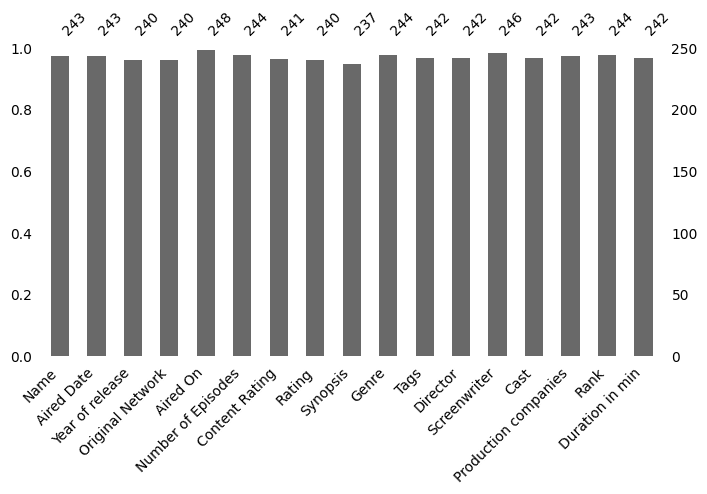

In [22]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

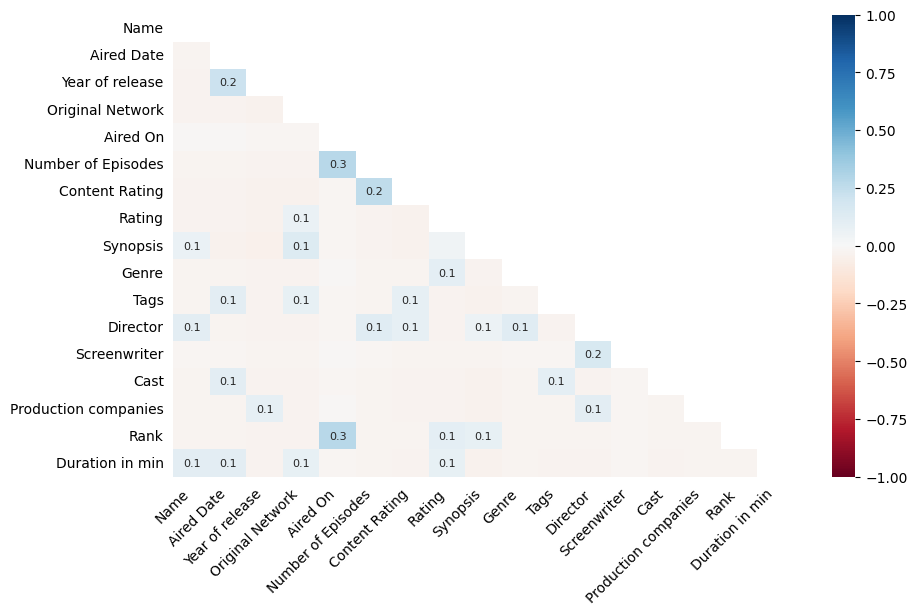

In [23]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


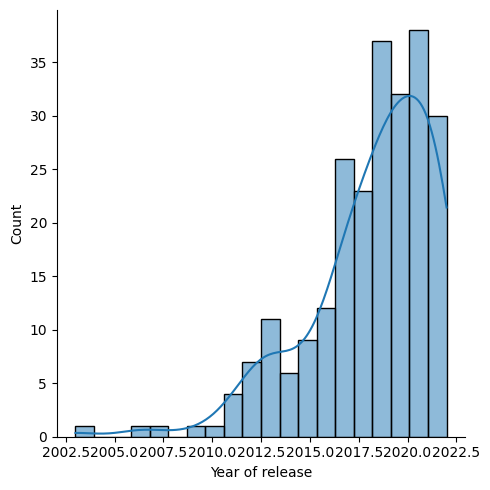

In [24]:
sns.displot(data=df, x="Year of release", kde=True, bins=20) #negative skew

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


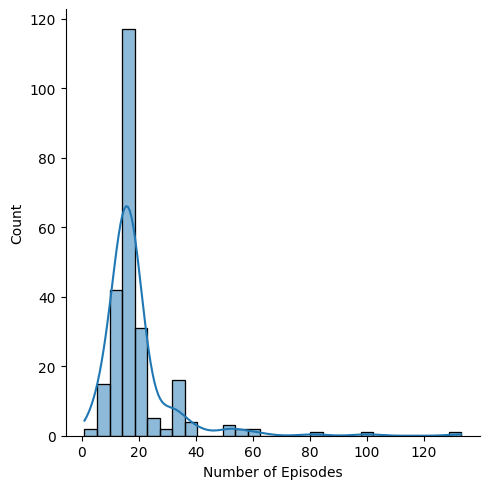

In [25]:
sns.displot(data=df, x="Number of Episodes", kde=True, bins=30) #positive skew

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


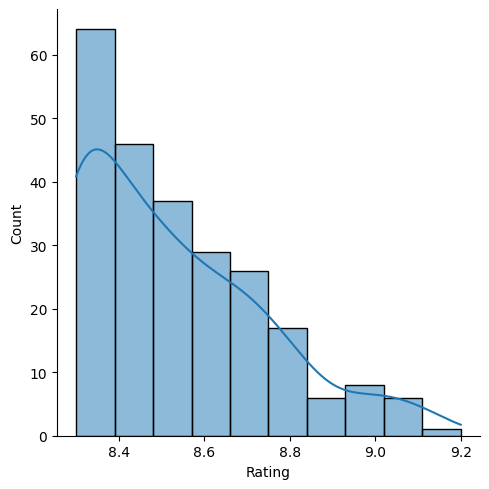

In [26]:
sns.displot(data=df, x="Rating", kde=True, bins=10)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


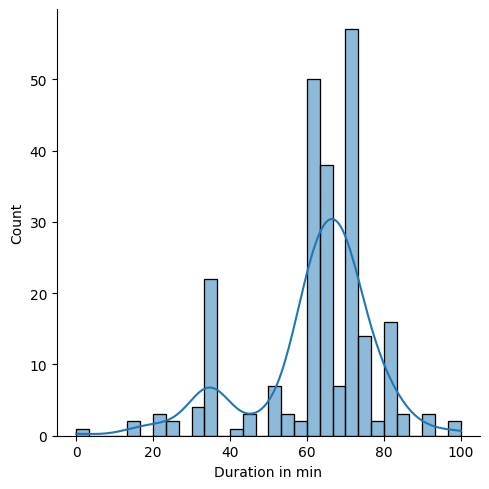

In [27]:
sns.displot(data=df, x="Duration in min", kde=True, bins=30)

In [28]:
df["Year of release"].median()

2019.0

In [29]:
df["Number of Episodes"].median()


16.0

In [30]:
df["Rating"].median()

8.5

In [31]:
df["Duration in min"].median()

65.0

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year of release,240.0,2018.225000,3.288022,2003.0,2017.0,2019.0,2021.0,2022.0
Number of Episodes,244.0,19.106557,13.357883,1.0,16.0,16.0,20.0,133.0
Rating,240.0,8.527083,0.217575,8.3,8.3,8.5,8.7,9.2
Duration in min,242.0,62.095041,15.561258,0.0,60.0,65.0,70.0,100.0


In [33]:
df_filled = df.copy()
df_filled["Year of release"].fillna(df["Year of release"].median(), inplace=True)

<ipython-input-33-c512eef3c776>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled["Year of release"].fillna(df["Year of release"].median(), inplace=True)


In [34]:
df_filled["Year of release"].isnull().sum()

0

In [35]:
df_filled["Number of Episodes"].fillna(df["Number of Episodes"].median(), inplace=True)

<ipython-input-35-0eff4a7e8a65>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled["Number of Episodes"].fillna(df["Number of Episodes"].median(), inplace=True)


In [36]:
df_filled["Number of Episodes"].isnull().sum()

0

In [37]:
df_filled["Rating"].fillna(df["Rating"].mean(), inplace=True)

<ipython-input-37-6bc716ea9f64>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled["Rating"].fillna(df["Rating"].mean(), inplace=True)


In [38]:
df_filled["Rating"].isnull().sum()

0

In [39]:
df_filled["Duration in min"].fillna(df["Duration in min"].median(), inplace=True)

<ipython-input-39-fb2e202f06b6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled["Duration in min"].fillna(df["Duration in min"].median(), inplace=True)


In [40]:
df_filled["Duration in min"].isnull().sum()

0

In [41]:
for col in df.columns:
    if col in categorical_features and col not in ["Name", "Synopsis", "Tags", "Rank"]:
        print(f"Column: {col}")
        print(f"Modes: {df[col].mode().tolist()}")  # Tüm modları liste olarak göster

Column: Aired Date
Modes: ['Sep-Nov']
Column: Original Network
Modes: ['tvN']
Column: Aired On
Modes: ['Wednesday, Thursday']
Column: Content Rating
Modes: ['15+']
Column: Genre
Modes: ['Psychological,  Comedy,  Romance,  Drama ', 'Thriller, Mystery, Drama']
Column: Director
Modes: ['Kim Won Suk']
Column: Screenwriter
Modes: ['Kim Eun Hee', 'Kim Young Hyun, Park Sang Yeon']
Column: Cast
Modes: ['Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim Dae Myung, Jeon Mi Do, Shin Hyun Bin']
Column: Production companies
Modes: ['Chorokbaem Media', 'JS Pictures', 'Samhwa Networks']
Column: Duration in min
Modes: [70.0]


In [42]:
df["Aired Date"].value_counts()

Aired Date
Sep-Nov    16
Nov-Jan    13
Mar-May    13
Feb-Apr    12
May-Jul    12
Jul-Sep    11
Jun-Jul    10
Oct-Nov    10
Jan-Mar    10
Jun-Aug     9
Apr-Jun     9
Mar-Apr     9
Aug-Oct     9
Dec-Feb     8
Jul-Aug     8
May-Jun     7
Dec-Jan     6
Aug-Sep     6
Sep-Oct     6
Apr-May     6
Oct-Dec     5
Nov-Dec     4
May-Aug     4
Nov-Nov     3
May-May     2
Mar-Mar     2
Sep-Sep     2
Jun-Jun     2
Jan-Jan     2
Jan-Feb     2
Feb-Mar     2
Jun-Sep     1
Feb-Feb     1
Aug-Aug     1
Aug-Nov     1
Sep-Mar     1
Dec-Dec     1
Oct-Mar     1
Oct-Jan     1
Dec-Mar     1
Oct-Apr     1
Feb-Aug     1
May-Sep     1
Nov-Feb     1
Mar-Aug     1
May-Nov     1
Feb-May     1
May-Mar     1
May-Dec     1
Jan-May     1
Mar-Sep     1
Mar-Oct     1
Jul-Oct     1
Apr-Apr     1
Name: count, dtype: int64

In [43]:
df[df['Aired Date'].isna()].index

Index([58, 61, 181, 193, 206, 215, 231], dtype='int64')

In [44]:
df["Aired Date"][55:65]

55    Jan-Mar
56    Aug-Nov
57    Feb-Apr
58        NaN
59    Feb-Apr
60    Feb-Apr
61        NaN
62    Jul-Sep
63    Dec-Feb
64    Nov-Jan
Name: Aired Date, dtype: category
Categories (54, object): ['Apr-Apr', 'Apr-Jun', 'Apr-May', 'Aug-Aug', ..., 'Sep-Mar', 'Sep-Nov', 'Sep-Oct', 'Sep-Sep']

In [45]:
df_filled["Aired Date"] = df_filled["Aired Date"].fillna(method="bfill")

<ipython-input-45-4ec6cf53076e>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled["Aired Date"] = df_filled["Aired Date"].fillna(method="bfill")


In [46]:
df_filled["Aired Date"][55:65]

55    Jan-Mar
56    Aug-Nov
57    Feb-Apr
58    Feb-Apr
59    Feb-Apr
60    Feb-Apr
61    Jul-Sep
62    Jul-Sep
63    Dec-Feb
64    Nov-Jan
Name: Aired Date, dtype: category
Categories (54, object): ['Apr-Apr', 'Apr-Jun', 'Apr-May', 'Aug-Aug', ..., 'Sep-Mar', 'Sep-Nov', 'Sep-Oct', 'Sep-Sep']

In [47]:
df["Aired Date"][178:235]

178    Oct-Nov
179    Oct-Dec
180    Jul-Aug
181        NaN
182    May-Jul
183    Mar-Apr
184    May-Jul
185    Jul-Sep
186    Sep-Oct
187    Jun-Jul
188    Sep-Oct
189    May-May
190    Nov-Dec
191    Aug-Oct
192    Mar-Mar
193        NaN
194    Dec-Feb
195    Jul-Aug
196    Mar-Apr
197    Nov-Nov
198    Sep-Oct
199    Aug-Oct
200    Apr-Jun
201    Nov-Dec
202    May-Mar
203    Sep-Nov
204    May-Nov
205    Feb-Mar
206        NaN
207    Mar-May
208    Apr-May
209    Jun-Jun
210    Jun-Aug
211    Dec-Feb
212    Oct-Nov
213    May-Jun
214    May-Jul
215        NaN
216    Feb-Apr
217    Feb-Mar
218    Mar-May
219    Aug-Sep
220    May-Jul
221    May-Jun
222    Feb-Apr
223    May-Jul
224    Mar-Apr
225    Jul-Aug
226    Feb-Aug
227    Sep-Nov
228    Jun-Aug
229    Dec-Feb
230    Oct-Nov
231        NaN
232    Mar-May
233    Sep-Nov
234    Nov-Jan
Name: Aired Date, dtype: category
Categories (54, object): ['Apr-Apr', 'Apr-Jun', 'Apr-May', 'Aug-Aug', ..., 'Sep-Mar', 'Sep-Nov', 'Sep-Oct', 'Se

In [48]:
df_filled["Aired Date"].fillna(df["Aired Date"].mode(), inplace=True)

<ipython-input-48-d93a5497e7d3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled["Aired Date"].fillna(df["Aired Date"].mode(), inplace=True)


In [49]:
df_filled["Aired Date"].isnull().sum()

0

In [50]:
df["Original Network"].value_counts()

Original Network
tvN                       48
SBS                       28
KBS2                      25
MBC                       23
OCN                       19
Netflix,  tvN             15
jTBC                      14
Netflix                   11
Netflix, tvN               7
Netflix, SBS               4
jTBC, Netflix              4
MBC, Netflix               3
iQiyi, tvN                 2
Wavve                      2
jTBC, Viki                 2
Netflix,  SBS              2
jTBC,  Netflix             2
YouTube                    2
ViuTV                      1
iQiyi, jTBC                1
TV Chosun                  1
SBS, ViuTV                 1
jTBC,  Viki                1
OCN, tvN                   1
iQiyi, KBS2, Viki          1
Viki                       1
Apple TV+                  1
Channel A                  1
Netflix,  OCN              1
Daum Kakao TV              1
Daum Kakao TV, Netflix     1
Disney+                    1
ENA, Netflix               1
ENA, Olleh TV             

In [51]:
df[df['Original Network'].isna()].index

Index([35, 48, 97, 115, 129, 137, 163, 174, 220, 221], dtype='int64')

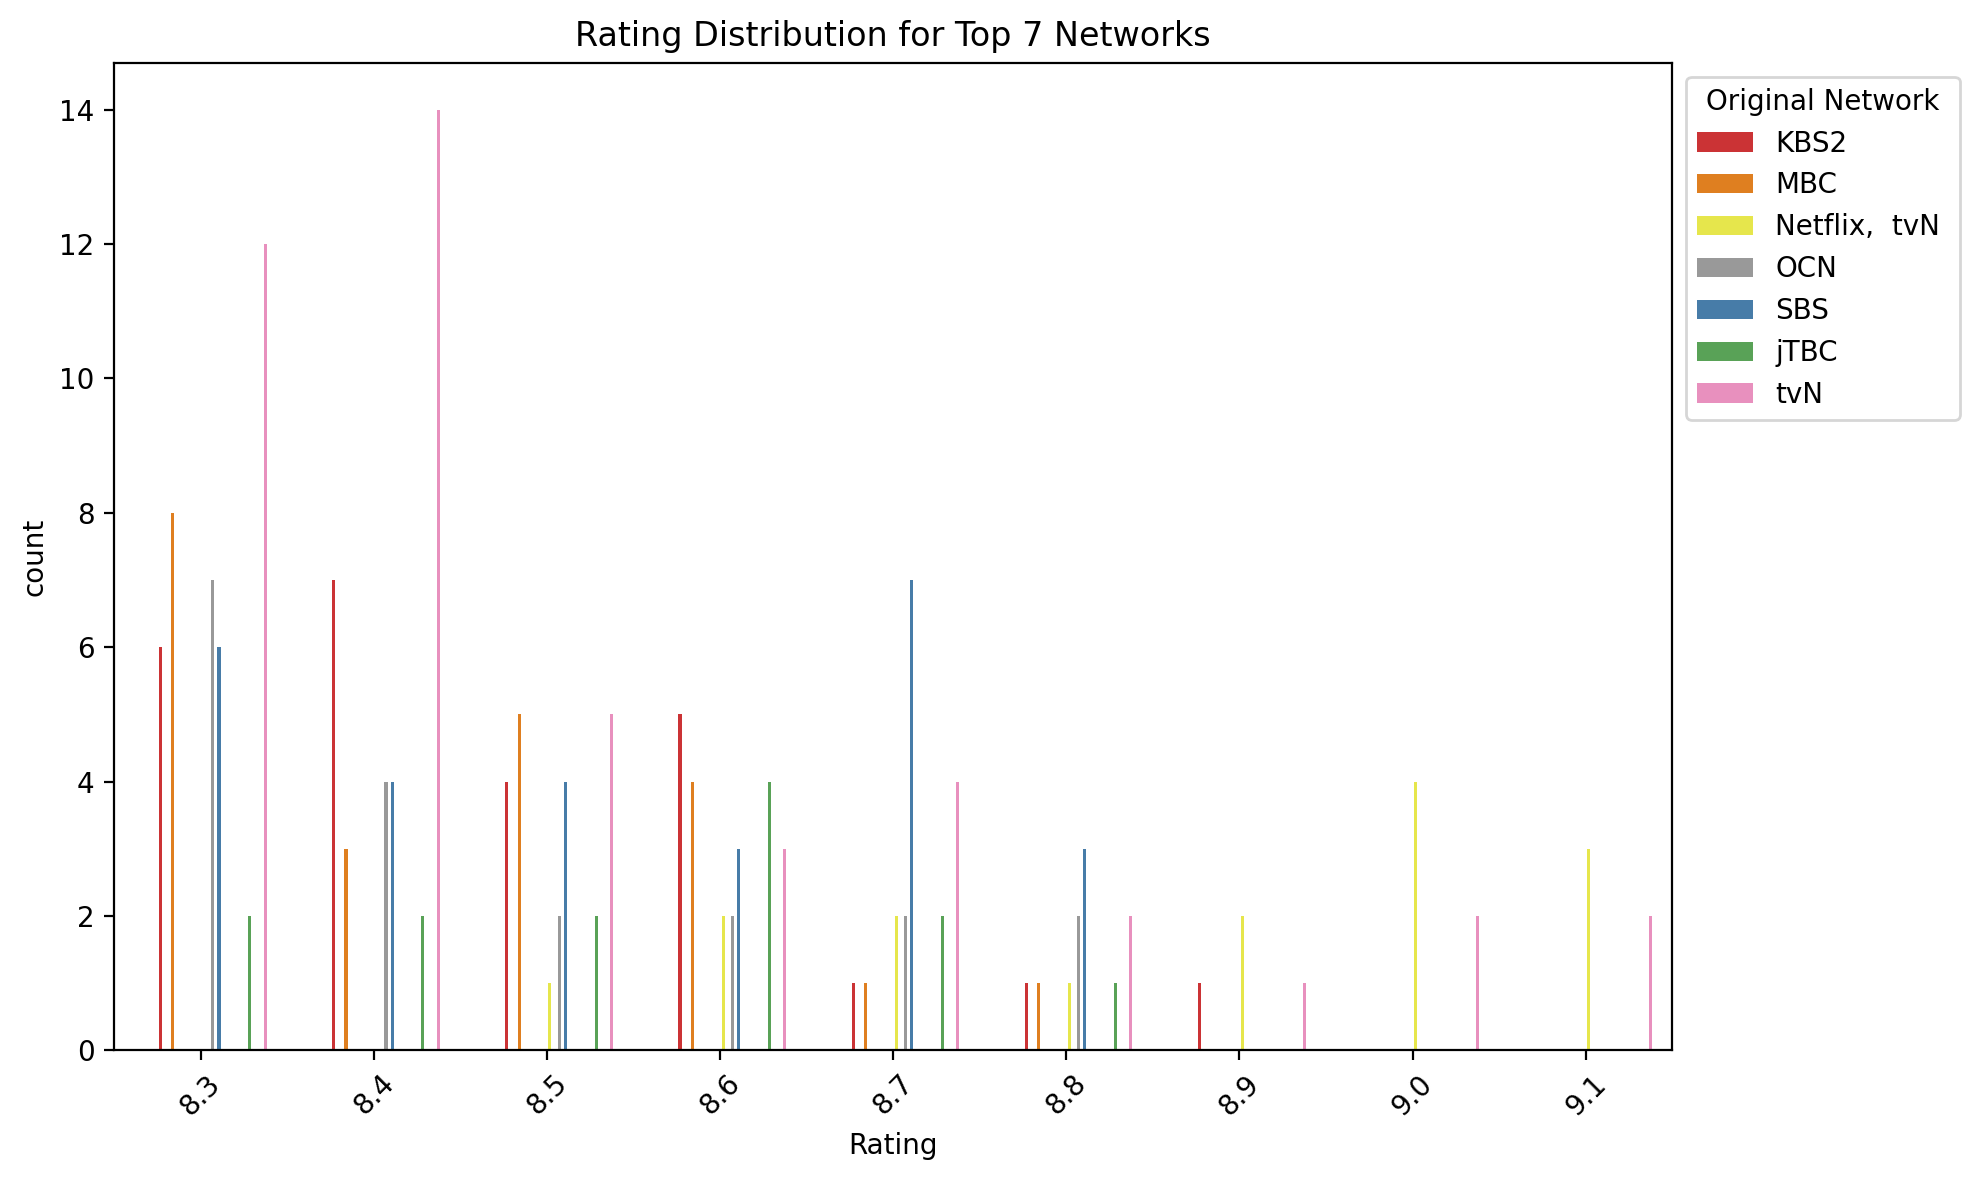

In [52]:
# En sık geçen 7 Original Network'ü bul
top_7_networks = df['Original Network'].value_counts().nlargest(7).index

# Sadece bu ağları içeren veri setini filtrele
filtered_df = df[df['Original Network'].isin(top_7_networks)]

# Grafiği oluştur
plt.figure(figsize=(10, 6), dpi=200)
ax = sns.countplot(x='Rating', data=filtered_df, hue='Original Network', palette='Set1')

# Legend kısmını özelleştir
handles, labels = ax.get_legend_handles_labels()
filtered_labels = [label for label in labels if label in top_7_networks]
filtered_handles = [handle for handle, label in zip(handles, labels) if label in top_7_networks]

plt.legend(filtered_handles, filtered_labels, title='Original Network', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Rating Distribution for Top 7 Networks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Sütunu float'a dönüştür
df_filled["Rank"] = df_filled["Rank"].astype(float)

# Rank'e göre Original Network'ü doldur
df_filled.loc[df_filled["Rank"] >= 8.9, "Original Network"] = "Netflix, tvN"
df_filled.loc[df_filled["Rank"] == 8.6, "Original Network"] = "KBS2"
df_filled.loc[df_filled["Rank"] == 8.7, "Original Network"] = "SBS"
df_filled.loc[df_filled["Rank"].isin([8.3, 8.4, 8.5]), "Original Network"] = "tvN"

# Varsayılan olarak NaN değerleri doldur
df_filled["Original Network"] = df_filled["Original Network"].fillna("tvN")

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


In [54]:
df_filled["Original Network"].isnull().sum()

0

In [55]:
df_filled.isnull().sum()

Name                     7
Aired Date               0
Year of release          0
Original Network         0
Aired On                 2
Number of Episodes       0
Content Rating           9
Rating                   0
Synopsis                13
Genre                    6
Tags                     8
Director                 8
Screenwriter             4
Cast                     8
Production companies     7
Rank                     6
Duration in min          0
dtype: int64

In [56]:
df[df["Name"].isna()]["Name"]

8      NaN
116    NaN
125    NaN
154    NaN
207    NaN
235    NaN
248    NaN
Name: Name, dtype: category
Categories (243, object): ['100 Days My Prince', '18 Again', '365', '49 Days', ..., 'Work Later, Drink Now', 'Youth of May', 'Yumi's Cells', 'Yumi's Cells 2']

In [57]:
df_filled["Name"] = df_filled["Name"].astype(str)

# Değeri doğrudan atama
df_filled.loc[8, "Name"] = "Alchemy of Souls"

In [58]:
df_filled["Name"] = df_filled["Name"].astype(str)

# Değeri doğrudan atama
df_filled.loc[116, "Name"] = "W"

In [59]:
df_filled["Name"] = df_filled["Name"].astype(str)

# Değeri doğrudan atama
df_filled.loc[125, "Name"] = "Circle"

In [60]:
df_filled["Name"] = df_filled["Name"].astype(str)

# Değeri doğrudan atama
df_filled.loc[154, "Name"] = "Mad Dog"

In [61]:
df_filled["Name"] = df_filled["Name"].astype(str)

# Değeri doğrudan atama
df_filled.loc[207, "Name"] = "Confession"

In [62]:
df_filled["Name"] = df_filled["Name"].astype(str)

# Değeri doğrudan atama
df_filled.loc[235, "Name"] = "Oh My Venus"

In [63]:
df_filled["Name"] = df_filled["Name"].astype(str)

# Değeri doğrudan atama
df_filled.loc[248, "Name"] = "A Korean Odyssey"

In [64]:
df_filled.isna().sum()

Name                     0
Aired Date               0
Year of release          0
Original Network         0
Aired On                 2
Number of Episodes       0
Content Rating           9
Rating                   0
Synopsis                13
Genre                    6
Tags                     8
Director                 8
Screenwriter             4
Cast                     8
Production companies     7
Rank                     6
Duration in min          0
dtype: int64

In [65]:
df[df["Aired On"].isna()]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
54,Sweet Home,Dec-Dec,2020.0,Netflix,NaN,10.0,18+,8.7,Following the death of his family in an accide...,"Horror, Drama, Sci-Fi, Supernatural","Monsters, Gore, Survival, Character Developmen...",Lee Eung Bok,Kim Hyung Min,"Song Kang, Lee Jin Wook, Lee Si Young, Lee Do ...","Studio Dragon, Studio N",NaN,52.0
194,True Beauty,Dec-Feb,2020.0,tvN,NaN,NaN,15+,8.3,True Beauty is a romantic comedy about a high ...,"Comedy, Romance, Youth, Drama","Adapted From A Webtoon, Makeover, Popular Male...",Kim Sang Hyub,Lee Shi Eun,"Moon Ga Young, Cha Eun Woo, Hwang In Youp, Par...","Bon Factory Worldwide, Studio N",195,75.0


In [66]:
df["Aired On"].value_counts()

Aired On
Wednesday, Thursday                             39
Monday, Tuesday                                 36
Saturday, Sunday                                26
 Monday, Tuesday                                24
 Wednesday, Thursday                            23
Friday, Saturday                                23
 Saturday, Sunday                               21
 Friday, Saturday                               20
Friday                                          17
Wednesday                                        4
Saturday                                         2
Sunday                                           2
Thursday                                         2
Tuesday                                          2
Monday, Thursday                                 1
Monday, Tuesday, Wednesday                       1
 Sunday, Saturday                                1
Thursday, Wednesday                              1
Tuesday, Thursday                                1
Wednesday, Saturday   

In [67]:
df_filled["Aired On"] = df_filled["Aired On"].fillna(df["Aired On"].mode()[0])

In [68]:
df_filled["Aired On"].isnull().sum()

0

In [69]:
df_filled.isnull().sum()

Name                     0
Aired Date               0
Year of release          0
Original Network         0
Aired On                 0
Number of Episodes       0
Content Rating           9
Rating                   0
Synopsis                13
Genre                    6
Tags                     8
Director                 8
Screenwriter             4
Cast                     8
Production companies     7
Rank                     6
Duration in min          0
dtype: int64

In [70]:
df_filled["Content Rating"].value_counts()

Content Rating
15+              207
18+               20
13+                8
Unknown            5
G - All Ages+      1
Name: count, dtype: int64

In [71]:
df_filled["Content Rating"] = df_filled["Content Rating"].fillna(df["Content Rating"].mode()[0])

In [72]:
df_filled["Content Rating"].value_counts()

Content Rating
15+              216
18+               20
13+                8
Unknown            5
G - All Ages+      1
Name: count, dtype: int64

In [73]:
df_filled['Content Rating'].replace(to_replace='Unknown',value='15+')

<ipython-input-73-15f316e87199>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_filled['Content Rating'].replace(to_replace='Unknown',value='15+')


0      18+
1      15+
2      15+
3      15+
4      15+
      ... 
245    15+
246    15+
247    15+
248    15+
249    15+
Name: Content Rating, Length: 250, dtype: category
Categories (4, object): ['13+', '15+', '18+', 'G - All Ages+']

In [74]:
df_filled["Content Rating"].value_counts()

Content Rating
15+              216
18+               20
13+                8
Unknown            5
G - All Ages+      1
Name: count, dtype: int64

In [75]:
df_filled.isna().sum()

Name                     0
Aired Date               0
Year of release          0
Original Network         0
Aired On                 0
Number of Episodes       0
Content Rating           0
Rating                   0
Synopsis                13
Genre                    6
Tags                     8
Director                 8
Screenwriter             4
Cast                     8
Production companies     7
Rank                     6
Duration in min          0
dtype: int64

In [76]:
df_filled.head(10)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
0,Move to Heaven,May-May,2021.0,Netflix,Friday,10.0,18+,9.200000,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",1.0,52.0
1,Flower of Evil,Jul-Sep,2019.0,tvN,"Wednesday, Thursday",16.0,15+,9.100000,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,2.0,70.0
2,Hospital Playlist,Mar-May,2020.0,"Netflix, tvN",Thursday,12.0,15+,9.100000,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",3.0,90.0
3,Hospital Playlist 2,Jun-Sep,2021.0,"Netflix, tvN",Thursday,12.0,15+,9.100000,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",4.0,100.0
4,My Mister,Mar-May,2018.0,tvN,"Wednesday, Thursday",16.0,15+,9.100000,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,5.0,77.0
5,Reply 1988,Nov-Jan,2015.0,tvN,"Friday, Saturday",20.0,15+,8.527083,"Five childhood friends, who all live in the sa...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...","Shin Won Ho, Yoo Hak Chan",Lee Woo Jung,"Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...",CJ ENM,6.0,100.0
6,Weak Hero Class 1,Nov-Nov,2022.0,Wavve,Friday,8.0,18+,9.100000,NaN,"Action, Youth, Drama\r","Bromance, Smart Male Lead, Violence, School Bu...",You Su Min,Jun Hee Han,"Park Ji Hoon, Choi Hyun Wook, Hong Kyung, Kim ...",PlayList Global,7.0,40.0
7,Prison Playbook,Nov-Jan,2017.0,"Netflix, tvN","Wednesday, Thursday",16.0,15+,9.100000,"Kim Je Hyuk, a famous baseball player, is arre...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",Shin Won Ho,"Jung Bo Hoon, Lee Woo Jung","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...",tvN,8.0,92.0
8,Alchemy of Souls,Jun-Aug,2022.0,"Netflix, tvN","Saturday, Sunday",20.0,15+,9.000000,Set in a fictional country called Daeho that d...,"Action, Historical, Romance, Fantasy","Magical Power, Supernatural, Transmigration, S...",Park Joon Hwa,"Hong Jung Eun, Hong Mi Ran","Lee Jae Wook, Jung So Min, Hwang Hyun Min, Shi...","Studio Dragon, High Quality",9.0,80.0
9,Extraordinary Attorney Woo,Jun-Aug,2022.0,"Netflix, tvN","Wednesday, Thursday",16.0,15+,9.000000,"Diagnosed with autism spectrum disorder, 27-ye...","Law, Romance, Life, Drama","Autistic Female Lead, Autism, Attorney Female...",Yoo In Shik,Moon Ji Won,"Park Eun Bin, Kang Tae Oh, Kang Ki Young, Jeon...","AStory, KT Studio Genie, Nangman Crew",10.0,77.0


In [77]:
df_filled["Year of release"] = df_filled["Year of release"].round(0).astype(int)

In [78]:
df_filled["Number of Episodes"] = df_filled["Number of Episodes"].round(0).astype(int)
df_filled["Duration in min"] = df_filled["Duration in min"].round(0).astype(int)

In [79]:
df_filled.head(5)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
0,Move to Heaven,May-May,2021,Netflix,Friday,10,18+,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",1.0,52
1,Flower of Evil,Jul-Sep,2019,tvN,"Wednesday, Thursday",16,15+,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,2.0,70
2,Hospital Playlist,Mar-May,2020,"Netflix, tvN",Thursday,12,15+,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",3.0,90
3,Hospital Playlist 2,Jun-Sep,2021,"Netflix, tvN",Thursday,12,15+,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",4.0,100
4,My Mister,Mar-May,2018,tvN,"Wednesday, Thursday",16,15+,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,5.0,77


In [80]:
df_filled["Rank"] = df_filled["Rank"].astype(float)

# NaN değerleri doldur
df_filled.loc[df_filled["Rank"].isna(), "Rank"] = df_filled.index[df_filled["Rank"].isna()] + 1

In [81]:
df_filled.isna().sum()

Name                     0
Aired Date               0
Year of release          0
Original Network         0
Aired On                 0
Number of Episodes       0
Content Rating           0
Rating                   0
Synopsis                13
Genre                    6
Tags                     8
Director                 8
Screenwriter             4
Cast                     8
Production companies     7
Rank                     0
Duration in min          0
dtype: int64

In [82]:
df["Production companies"].value_counts()

Production companies
JS Pictures                                                                 7
Samhwa Networks                                                             7
Chorokbaem Media                                                            7
HB Entertainment                                                            6
Studio Dragon                                                               6
                                                                           ..
KBS, Next Entertainment World, Barunson Inc., Descendants of the Sun SPC    1
KPJ                                                                         1
Kakao Entertainment, Kross Pictures                                         1
Kakao Entertainment, S-PEACE                                                1
tvN, Studio Dragon, KPJ                                                     1
Name: count, Length: 170, dtype: int64

In [83]:
df_filled.head(5)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
0,Move to Heaven,May-May,2021,Netflix,Friday,10,18+,9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",1.0,52
1,Flower of Evil,Jul-Sep,2019,tvN,"Wednesday, Thursday",16,15+,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,2.0,70
2,Hospital Playlist,Mar-May,2020,"Netflix, tvN",Thursday,12,15+,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",3.0,90
3,Hospital Playlist 2,Jun-Sep,2021,"Netflix, tvN",Thursday,12,15+,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",4.0,100
4,My Mister,Mar-May,2018,tvN,"Wednesday, Thursday",16,15+,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,5.0,77


In [84]:
unique_actors = set()

df_filled["Cast"].dropna().apply(lambda cast: unique_actors.update([actor.strip() for actor in cast.split(",")]))

unique_actors_list = list(unique_actors)

In [85]:
unique_actors_list

['Shin Eun Kyung',
 'Kang Seung Hyun',
 'Kyung Soo Jin',
 'Choi Hyun Wook',
 'Park Ji Bin',
 'Cho Hye Jung',
 'Lee Dong Wook',
 'Lee Yeon',
 'Jeon Jong Seo',
 'Cha Shi Won',
 'Lee Sae On',
 'Kwon Hwa Woon',
 'Park Jin Hee',
 'Kyeon Mi Ri',
 'Kwak Dong Yeon',
 'Heo Jung Do',
 'Jo Sung Ha',
 'Ye Ji Won',
 'Lee Deok Hwa',
 'Woo Hee Jin',
 'Kang Hoon',
 'Shin Jung Keun',
 'Jung Chae Yeon',
 'Yang Hee Kyung',
 'Son Sung Yoon',
 'Eugene',
 'Park Young Gyu',
 'Lee Kyu Hyung',
 'Choi Dae Hoon',
 'Park So Hee',
 'Park Shi Hoo',
 'Baro',
 'Ahn Suk Hwan',
 'Kwon Seung Woo',
 'Jang Hyuk Jin',
 'Ok Ja Yeon',
 'Kim Young Min',
 'Mi Ram',
 'Lee Dong Hwi',
 'Kim Kwon',
 'Shin Ha Ri receives a phone call from Kang Tae Mu. He asks her to marry him.',
 'Jang Ki Yong',
 'Kim Sae Ron',
 'Oh Jung Se',
 'Jo Jin Woong',
 'Park Hyung Sik',
 'Hong Bi Ra',
 'Lee Da In',
 'Lee Tae Hwan',
 'Hong Kyung',
 'Park  Hyo Joo',
 'Kim Jung Min',
 'Kim Yoo Bin',
 'Cho Byeong Kyu',
 'Go Min Si',
 'Lee Do Hyun',
 'Kim Hye Ja

In [86]:
specific_actor = "so he won't be disturbed from his work anymore. That woman is Shin Ha Ri"
filtered_rows = df_filled[df_filled["Cast"].str.contains(specific_actor, na=False)]

print(filtered_rows)

                   Name Aired Date  Year of release Original Network  \
57  A Business Proposal    Feb-Apr             2022     Netflix, tvN   

           Aired On  Number of Episodes Content Rating  Rating  \
57  Monday, Tuesday                  12            15+     8.7   

                                             Synopsis                   Genre  \
57  Shin Ha Ri is a single woman and works for a c...  Comedy, Romance, Drama   

                                                 Tags      Director  \
57  Boss-Employee Relationship, Secondary Couple, ...  Park Seon Ho   

                Screenwriter  \
57  Han Sul Hee, Hong Bo Hee   

                                                 Cast  \
57  Shin Ha Ri is a single woman and works for a c...   

                   Production companies  Rank  Duration in min  
57  Kakao Entertainment, Kross Pictures  58.0               60  


In [88]:
# Cümlelerin indekslerini bul
invalid_indices = [index for index, value in enumerate(unique_actors_list) if len(value.split()) > 5]

# İndeksleri ve o elemanları göster
invalid_elements = [(index, unique_actors_list[index]) for index in invalid_indices]

print("Hatalı Elemanlar:")
for idx, elem in invalid_elements:
    print(f"Index: {idx}, Değer: {elem}")

# Geçerli olan oyuncuları filtrele
unique_actors_list = [value for value in unique_actors_list if len(value.split()) <= 5]

Hatalı Elemanlar:
Index: 40, Değer: Shin Ha Ri receives a phone call from Kang Tae Mu. He asks her to marry him.
Index: 86, Değer: but she learns he has a girlfriend. Shin Ha Ri feels sad and decides to meet her friend Jin Young Seo
Index: 137, Değer: Shin Ha Ri is a single woman and works for a company. She has a male friend
Index: 174, Değer: so he won't be disturbed from his work anymore. That woman is Shin Ha Ri
Index: 247, Değer: Shin Ha Ri is dumbfounded. Her blind date is Kang Tae Mu. He is the CEO of the company where she works. Kang Tae Mu is the CEO of a company that his grandfather founded. One day
Index: 693, Değer: who she has had a crush on for a long time
Index: 694, Değer: who is a daughter of a chaebol family. Jin Young Seo then asks Shin Ha Ri to take her place in a blind date and even offers some money for her time. Shin Ha Ri accepts her friend's offer. She goes out on the blind date as Jin Young Seo
Index: 699, Değer: but pretending to be Jin Young Seo. On the foll

In [89]:
unique_actors_list

['Shin Eun Kyung',
 'Kang Seung Hyun',
 'Kyung Soo Jin',
 'Choi Hyun Wook',
 'Park Ji Bin',
 'Cho Hye Jung',
 'Lee Dong Wook',
 'Lee Yeon',
 'Jeon Jong Seo',
 'Cha Shi Won',
 'Lee Sae On',
 'Kwon Hwa Woon',
 'Park Jin Hee',
 'Kyeon Mi Ri',
 'Kwak Dong Yeon',
 'Heo Jung Do',
 'Jo Sung Ha',
 'Ye Ji Won',
 'Lee Deok Hwa',
 'Woo Hee Jin',
 'Kang Hoon',
 'Shin Jung Keun',
 'Jung Chae Yeon',
 'Yang Hee Kyung',
 'Son Sung Yoon',
 'Eugene',
 'Park Young Gyu',
 'Lee Kyu Hyung',
 'Choi Dae Hoon',
 'Park So Hee',
 'Park Shi Hoo',
 'Baro',
 'Ahn Suk Hwan',
 'Kwon Seung Woo',
 'Jang Hyuk Jin',
 'Ok Ja Yeon',
 'Kim Young Min',
 'Mi Ram',
 'Lee Dong Hwi',
 'Kim Kwon',
 'Jang Ki Yong',
 'Kim Sae Ron',
 'Oh Jung Se',
 'Jo Jin Woong',
 'Park Hyung Sik',
 'Hong Bi Ra',
 'Lee Da In',
 'Lee Tae Hwan',
 'Hong Kyung',
 'Park  Hyo Joo',
 'Kim Jung Min',
 'Kim Yoo Bin',
 'Cho Byeong Kyu',
 'Go Min Si',
 'Lee Do Hyun',
 'Kim Hye Ja',
 'Lee  Han Wi',
 'Lee Joon',
 'Kim Hye Yoon',
 'Kim Da Som',
 'Jeon Hyo Sung',

In [90]:
actor_to_drama = []

for actor in unique_actors_list:
    dramas = df_filled[df_filled["Cast"].str.contains(actor, na=False)][["Name", "Rating"]]
    formatted_dramas = [f"{row['Name']}[{row['Rating']}]" for _, row in dramas.iterrows()]
    actor_to_drama.append({"Actor": actor, "Dramas": formatted_dramas})

actor_df = pd.DataFrame(actor_to_drama)

In [91]:
actor_df.head(10)

,Actor,Dramas
0,Shin Eun Kyung,"[The Penthouse[8.8], The Penthouse 2[8.8]]"
1,Kang Seung Hyun,[Partners for Justice 2[8.6]]
2,Kyung Soo Jin,"[Mouse[8.7], Weightlifting Fairy Kim Bok Joo[8..."
3,Choi Hyun Wook,"[Weak Hero Class 1[9.1], Racket Boys[8.8]]"
4,Park Ji Bin,[Blind[8.5]]
5,Cho Hye Jung,[Weightlifting Fairy Kim Bok Joo[8.8]]
6,Lee Dong Wook,"[Goblin[8.8], Strangers from Hell[8.7], Bad an..."
7,Lee Yeon,[Weak Hero Class 1[9.1]]
8,Jeon Jong Seo,[Money Heist: Korea - Joint Economic Area - Pa...
9,Cha Shi Won,[Bad and Crazy[8.6]]


In [92]:
actor_df.shape

(799, 2)

In [93]:
df_filled[df_filled["Cast"].isna()]

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank,Duration in min
24,Twenty-Five Twenty-One,Feb-Apr,2022,"Netflix, tvN","Saturday, Sunday",16,15+,8.8,"In a time when dreams seem out of reach, a tee...","Romance, Life, Drama, Melodrama","Coming Of Age, Nostalgia, Fencing, Nice Male L...","Jung Ji Hyun, Kim Seung Ho",Kwon Do Eun,NaN,Hwa&Dam Pictures,25.0,75
151,Train,Jul-Aug,2020,"Netflix, tvN","Saturday, Sunday",12,15+,8.4,Haunted by the thought that his drunkard fathe...,"Thriller, Mystery, Sci-Fi","Parallel Dimension, Suspense, Murder, Death, T...",Lee Seung Hoon,Park Ga Yun,NaN,doFRAME,152.0,60
178,The Beauty Inside,Oct-Nov,2018,"Netflix, tvN","Monday, Tuesday",16,15+,8.4,"Han Se Gye is a top actress, also known as a t...","Comedy, Romance, Melodrama, Supernatural","Prosopagnosia, Successful Male Lead, Strong Fe...",Song Hyun Wook,Im Me Ah Ri,NaN,"Studio&NEW, Yong Film",179.0,70
183,Soundtrack #1,Mar-Apr,2022,"Netflix, tvN",Wednesday,4,13+,8.4,"Two people have been friends for two decades, ...","Music, Romance","Miniseries, Friends To Lovers, Unrequited Love...",Kim Hee Won,Ahn Sae Bom,NaN,"Red Nine Pictures, Xanadu Entertainment",184.0,44
191,Good Doctor,Aug-Oct,2013,"Netflix, tvN","Monday, Tuesday",20,15+,8.3,Although Park Shi On is an autistic savant who...,"Romance, Life, Drama, Medical","Autism, Eccentric Male Lead, Ableism, Child Ab...","Kim Jin Woo, Ki Min Soo",Park Jae Bum,NaN,Logos Film,192.0,65
202,Jumong,May-Mar,2006,"Netflix, tvN","Monday, Tuesday",81,15+,8.3,Jumong was the founder of Goguryeo in 37 BC. H...,"Adventure, Historical, Romance, Drama","Leadership, Strong Female Lead, Power Struggle...","Lee Joo Hwan, Kim Keun Hong","Choi Wan Kyu, Jung Hyung Soo",NaN,"Chorokbaem Media, Olive9",203.0,70
206,Voice 3: City of Accomplices,Mar-May,2019,"Netflix, tvN","Saturday, Sunday",16,15+,8.3,Emergency 112 call center members deal with an...,"Thriller, Mystery, Psychological, Crime",NaN,Nam Ki Hoon,Ma Jin Won,NaN,Content K,207.0,60
223,Lawless Lawyer,May-Jul,2018,"Netflix, tvN","Saturday, Sunday",16,15+,8.3,Whatever gets the job done. Bong Sang Pil gre...,"Action, Thriller, Law, Romance","Smart Female Lead, Strong Female Lead, Revenge...",Kim Jin Min,Yoon Hyun Ho,NaN,Logos Film,224.0,66


In [94]:
def get_actors_by_rating(df, rating):
    """
    Belirtilen rating'e sahip dizilerde oynayan oyuncuların listesini döner.

    Args:
        df (pd.DataFrame): Diziler ve oyuncular DataFrame'i.
        rating (float): Hedef rating.

    Returns:
        List[str]: Ratinge sahip dizilerde oynayan oyuncuların listesi.
    """
    # Rating değerine göre filtrele
    filtered_df = df[df["Rating"] == rating]
    
    # Oyuncuları toplamak için bir set kullan (tekrarları önlemek için)
    actor_set = set()
    
    for cast in filtered_df["Cast"].dropna():
        # Cast sütunundaki oyuncuları ayır ve set'e ekle
        actors = [actor.strip() for actor in cast.split(",")]
        actor_set.update(actors)
    
    return list(actor_set)

rating = 8.3
actors_with_rating_83 = get_actors_by_rating(df_filled, rating)

In [95]:
actors_with_rating_84 = get_actors_by_rating(df_filled, 8.4)
actors_with_rating_85 = get_actors_by_rating(df_filled, 8.5)
actors_with_rating_86 = get_actors_by_rating(df_filled, 8.6)
actors_with_rating_87 = get_actors_by_rating(df_filled, 8.7)
actors_with_rating_88 = get_actors_by_rating(df_filled, 8.8)
actors_with_rating_89 = get_actors_by_rating(df_filled, 8.9)
actors_with_rating_90 = get_actors_by_rating(df_filled, 9.0)
actors_with_rating_91 = get_actors_by_rating(df_filled, 9.1)

In [96]:
# Len değerlerini hesapla
lengths_actors_dependend_on_ratings = [
    len(actors_with_rating_83),
    len(actors_with_rating_84),
    len(actors_with_rating_85),
    len(actors_with_rating_86),
    len(actors_with_rating_87),
    len(actors_with_rating_88),
    len(actors_with_rating_89),
    len(actors_with_rating_90),
    len(actors_with_rating_91)
]

# Tüm sonuçları tek bir satırda yazdır
print("Lengths:", lengths_actors_dependend_on_ratings)

Lengths: [304, 224, 199, 155, 144, 90, 34, 47, 29]


In [97]:
from collections import Counter

def count_common_actors_by_rating(df, rating, unique_actors_list):
    """
    Belirtilen rating'e sahip dizilerde unique_actors_list içindeki oyunculardan
    kaçının tekrarlandığını döner.

    Args:
        df (pd.DataFrame): Diziler ve oyuncular DataFrame'i.
        rating (float): Hedef rating.
        unique_actors_list (list): Tüm benzersiz oyuncuların listesi.

    Returns:
        Dict[str, int]: Tekrar eden oyuncular ve tekrar sayıları.
    """
    # Rating değerine göre filtrele
    filtered_df = df_filled[df_filled["Rating"] == rating]
    
    # Oyuncuları unique_actors_list ile sınırlı şekilde topla
    all_actors = [actor.strip()
                  for cast in filtered_df["Cast"].dropna()
                  for actor in cast.split(",")
                  if actor.strip() in unique_actors_list]
    
    # Tekrar eden oyuncuları say
    actor_counts = Counter(all_actors)
    
    # Sadece birden fazla dizide yer alan oyuncuları filtrele
    common_actors = {actor: count for actor, count in actor_counts.items() if count > 1}
    
    return common_actors

rating = 8.3
common_actors83 = count_common_actors_by_rating(df_filled, rating, unique_actors_list)

In [98]:
common_actors84 = count_common_actors_by_rating(df_filled, 8.4, unique_actors_list)
common_actors85 = count_common_actors_by_rating(df_filled, 8.5, unique_actors_list)
common_actors86 = count_common_actors_by_rating(df_filled, 8.6, unique_actors_list)
common_actors87 = count_common_actors_by_rating(df_filled, 8.7, unique_actors_list)
common_actors88 = count_common_actors_by_rating(df_filled, 8.8, unique_actors_list)
common_actors89 = count_common_actors_by_rating(df_filled, 8.9, unique_actors_list)
common_actors90 = count_common_actors_by_rating(df_filled, 9.0, unique_actors_list)
common_actors91 = count_common_actors_by_rating(df_filled, 9.1, unique_actors_list)

In [99]:
# Len değerlerini hesapla
lengths_common_actors_depended_on_ratings = [
    len(common_actors83),
    len(common_actors84),
    len(common_actors85),
    len(common_actors86),
    len(common_actors87),
    len(common_actors88),
    len(common_actors89),
    len(common_actors90),
    len(common_actors91)
]

# Tüm sonuçları tek bir satırda yazdır
print("Lengths:", lengths_common_actors_depended_on_ratings)

Lengths: [48, 31, 20, 17, 13, 6, 2, 1, 6]


In [100]:
df_corr_actorrating = pd.DataFrame(list(zip(lengths_actors_dependend_on_ratings, lengths_common_actors_depended_on_ratings)), columns=["ActorSize", "CommonActorSize"])

In [101]:
df_corr_actorrating

,ActorSize,CommonActorSize
0,304,48
1,224,31
2,199,20
3,155,17
4,144,13
5,90,6
6,34,2
7,47,1
8,29,6


In [102]:
new_index = ["8.3", "8.4", "8.5", "8.6", "8.7", "8.8", "8.9", "9.0", "9.1"]

# Yeni indeksleri ata
df_corr_actorrating.index = new_index

In [103]:
df_corr_actorrating

,ActorSize,CommonActorSize
8.3,304,48
8.4,224,31
8.5,199,20
8.6,155,17
8.7,144,13
8.8,90,6
8.9,34,2
9.0,47,1
9.1,29,6


In [104]:
df_filled.isna().sum()

Name                     0
Aired Date               0
Year of release          0
Original Network         0
Aired On                 0
Number of Episodes       0
Content Rating           0
Rating                   0
Synopsis                13
Genre                    6
Tags                     8
Director                 8
Screenwriter             4
Cast                     8
Production companies     7
Rank                     0
Duration in min          0
dtype: int64

In [105]:
df_filled["Synopsis"] = df_["Synopsis"]

In [106]:
df_filled["Genre"] = df_["Genre"]

In [107]:
df_filled["Tags"] = df_["Tags"]

In [108]:
df_filled["Director"] = df_["Director"]

In [109]:
df_filled["Screenwriter"] = df_["Screenwriter"]

In [110]:
df_filled["Cast"] = df_["Cast"]

In [111]:
df_filled["Production companies"] = df_["Production companies"]

In [112]:
df_filled.isna().sum()

Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Content Rating          0
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                1
Screenwriter            1
Cast                    0
Production companies    2
Rank                    0
Duration in min         0
dtype: int64